# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!pip install fake_useragent
from fake_useragent import UserAgent
import requests
ua = UserAgent()
link = "https://www.historique-meteo.net/site/export.php?ville_id=221&annee=2019"
response = requests.get(link, headers={'User-Agent': ua.random}).text

file = open('temp.csv','w') 
file.write(response)
file.close()

df_weather = pd.read_csv('temp.csv', skiprows = 3).iloc[:,[0, 1, 2, -1]]
dico = {"météo très défavorable" : "very bad",
        "météo défavorable" : "bad",
        "météo correcte" : "not good not bad",
        "météo favorable" : "good",
        "météo idéale" : "very good"}
df_weather['OPINION'] = df_weather['OPINION'].apply(lambda x: dico[x])


# You have now a DataFrame with weather data

# Answer to the questions

## ScatterPlot with 2 variables, title and legend

In [0]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

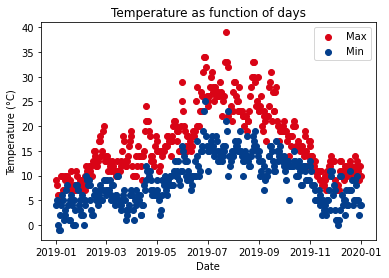

In [3]:
# First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph
# X-axis stay "DATE" for the both values
# You have to add title and legend

plt.scatter(x = "DATE", y = "MAX_TEMPERATURE_C", data = df_weather, c= '#D90416')
plt.scatter(x = "DATE", y = "MIN_TEMPERATURE_C", data = df_weather, c= '#033E8C') #You have to complete this code
plt.title('Temperature as function of days')
plt.legend(['Max', 'Min'])
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.show()


## 2 charts on the same figure

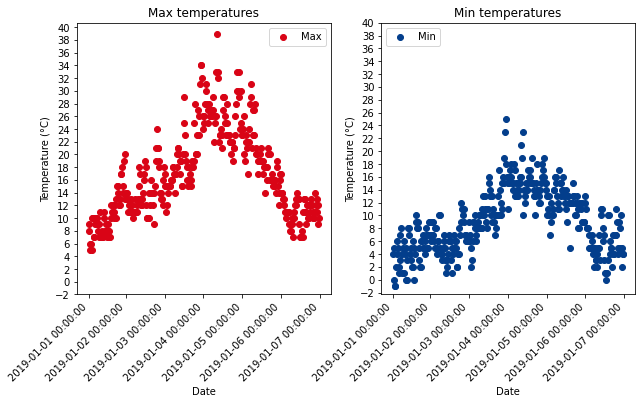

In [4]:
# Now, complete this code to have MAX and MIN Temperature in 2 charts, MAX on the left side and MIN on the right side 
# The X axis have to be the date of the year
# Each graph must have a title, a legend for the colors, and of course, readable axis (ticks)

fig, ax = plt.subplots(figsize = (10,5)) # fig is the global figure, which contains 2 subplots here (ax1 and ax2)
ax1 = plt.subplot(121) # 211 ? What does it mean ? 2 for 2 lines, 1 for 1 column and 1 for the first chart, you can change it
ax1.scatter(y = df_weather['MAX_TEMPERATURE_C'], x = df_weather['DATE'], c= '#D90416' )
ax1.yaxis.set_ticks(range(-2,41,2)) 
ax1.xaxis.set_ticklabels(df_weather['DATE'], rotation = 45, ha="right")
ax1.set_ylabel('Temperature (°C)')
ax1.set_xlabel('Date')
ax1.set_title('Max temperatures')
ax1.legend(['Max'])

ax2 = plt.subplot(122)
ax2.scatter(y = df_weather['MIN_TEMPERATURE_C'], x = df_weather['DATE'], c= '#033E8C')
ax2.yaxis.set_ticks(range(-2,41,2)) #Hey, look at this ! I just modified the scale and the ticks with only one line !
ax2.xaxis.set_ticklabels(df_weather['DATE'], rotation = 45, ha="right")
ax2.set_ylabel('Temperature (°C)')
ax2.set_xlabel('Date')
ax2.set_title('Min temperatures')
ax2.legend(['Min'], loc = 2)


plt.show()

## and 3 charts now !

In [5]:
# Now, you have to show a figure with 3 subplots :
#     For the top one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
#     In the middle : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
#     For the bottom one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
# Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)


df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

In [0]:
df_weather['YEAR'] = pd.DatetimeIndex(df_weather['DATE']).year
df_weather['MONTH'] = pd.DatetimeIndex(df_weather['DATE']).month
df_weather['DAY'] = pd.DatetimeIndex(df_weather['DATE']).day

In [7]:
df_weather.head(10)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION,YEAR,MONTH,DAY
0,2019-01-01,9,4,very bad,2019,1,1
1,2019-01-02,8,5,very bad,2019,1,2
2,2019-01-03,6,0,very bad,2019,1,3
3,2019-01-04,5,-1,very bad,2019,1,4
4,2019-01-05,6,-1,very bad,2019,1,5
5,2019-01-06,5,2,very bad,2019,1,6
6,2019-01-07,10,4,very bad,2019,1,7
7,2019-01-08,10,6,bad,2019,1,8
8,2019-01-09,7,5,very bad,2019,1,9
9,2019-01-10,7,1,very bad,2019,1,10


In [8]:
df_weather.OPINION.unique()

array(['very bad', 'bad', 'not good not bad', 'good', 'very good'],
      dtype=object)

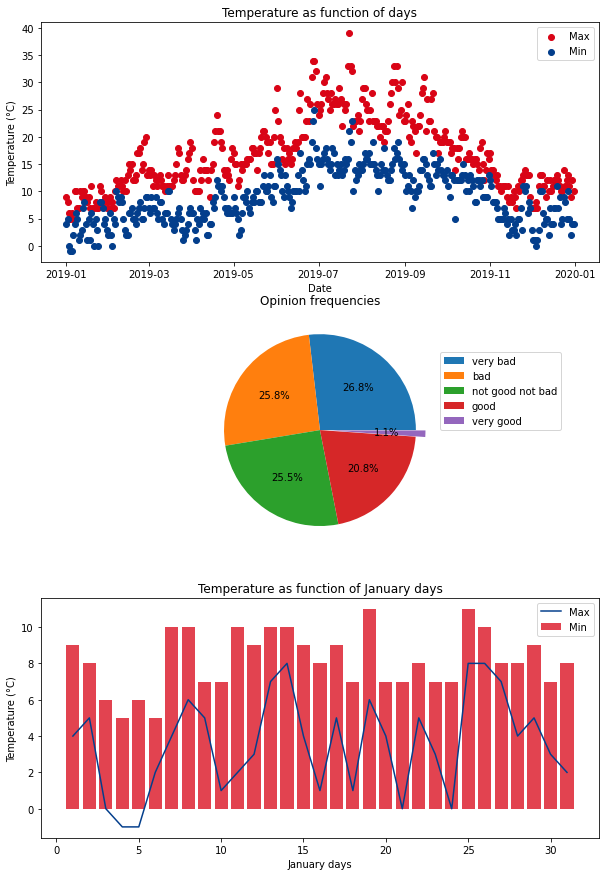

In [9]:
fig = plt.figure(figsize = (10, 15))
ax = fig.subplots(3, 1)
#     For the top one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
ax[0].scatter(x = "DATE", y = "MAX_TEMPERATURE_C", data = df_weather, c= '#D90416')
ax[0].scatter(x = "DATE", y = "MIN_TEMPERATURE_C", data = df_weather, c= '#033E8C') #You have to complete this code
ax[0].set_title('Temperature as function of days')
ax[0].legend(['Max', 'Min'])
ax[0].set_ylabel('Temperature (°C)')
ax[0].set_xlabel('Date')

#     In the middle : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
ax[1].pie(df_weather['OPINION'].value_counts(), explode = [0, 0, 0, 0, 0.1], autopct = '%1.1f%%')
ax[1].set_title('Opinion frequencies')
ax[1].legend(labels = ['very bad', 'bad', 'not good not bad', 'good', 'very good'], loc = (1, 0.5))

#     For the bottom one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
ax[2].bar('DAY', 'MAX_TEMPERATURE_C', data = df_weather[df_weather['MONTH'] == 1], color = '#D90416', alpha = .75)
ax[2].plot('DAY', 'MIN_TEMPERATURE_C', data = df_weather[df_weather['MONTH'] == 1], color = '#033E8C')
ax[2].set_title('Temperature as function of January days')
ax[2].legend(['Max', 'Min'])
ax[2].set_ylabel('Temperature (°C)')
ax[2].set_xlabel('January days')

plt.show()

## Last but not least

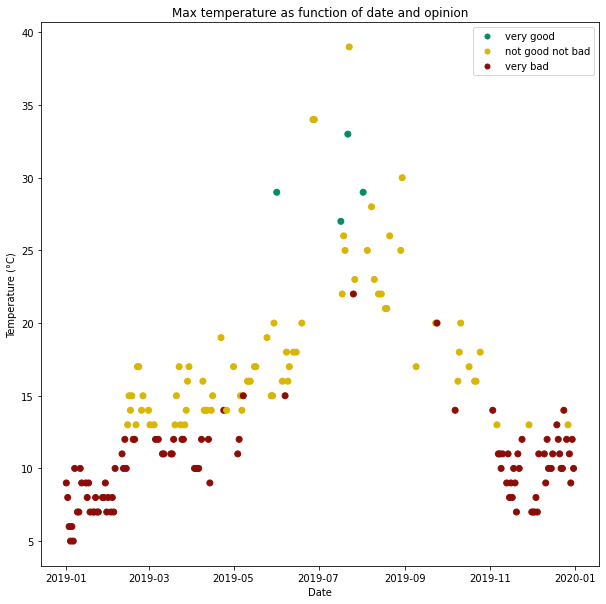

In [10]:
colors = {'very good':'#038C65','not good not bad':'#D9B504', 'very bad':'#8C0C07'}

data = df_weather[df_weather['OPINION'].isin(['very good', 'not good not bad', 'very bad'])]

fig= plt.figure(figsize = (10, 10))
_ = plt.scatter('DATE', 'MAX_TEMPERATURE_C', data = data, 
                c = data["OPINION"].apply(lambda x: colors[x]))

_ = plt.title('Max temperature as function of date and opinion')
_ = plt.ylabel('Temperature (°C)')
_ = plt.xlabel('Date')

patches = [ plt.plot([],[], marker="o", ms=5, ls="", mec=None, color=colors[i], 
            label="{:s}".format(i) )[0]  for i in colors ]
plt.legend(handles=patches)

_ = plt.legend(labels = ['very good', 'not good not bad', 'very bad'])
plt.show()

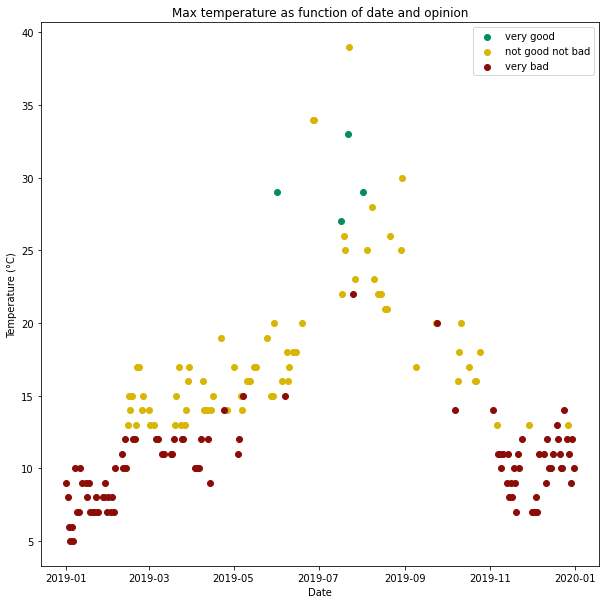

In [11]:
colors = {'very good':'#038C65', 'good':'#4CA633', 'not good not bad':'#D9B504', 'bad':'#D94B18', 'very bad':'#8C0C07'}

data = df_weather[df_weather['OPINION'].isin(['very good', 'not good not bad', 'very bad'])]

fig= plt.figure(figsize = (10, 10))
_ = plt.scatter('DATE', 'MAX_TEMPERATURE_C', data = data[data['OPINION'] == 'very good'], c = '#038C65')
_ = plt.scatter('DATE', 'MAX_TEMPERATURE_C', data = data[data['OPINION'] == 'not good not bad'], c = '#D9B504')
_ = plt.scatter('DATE', 'MAX_TEMPERATURE_C', data = data[data['OPINION'] == 'very bad'], c = '#8C0C07')

_ = plt.title('Max temperature as function of date and opinion')
_ = plt.ylabel('Temperature (°C)')
_ = plt.xlabel('Date')
_ = plt.legend(labels = ['very good', 'not good not bad', 'very bad'])

plt.show()

In [0]:
# We would know if Opinion is a good indicator.
# Could you draw 1 scatterplot with :
#       DATE on X-axis
#       MAX Temperature on Y-axis
#       Colorize in green the good and very good points
#       Colorize in red the bad and very bad points
#       Colorize in yellow the not good not bad points
# Tips : index can help you to sort the date correctly
# The chart must have a title, a legend for the colors, and of course, readable axis (ticks)
